# Plotting Utility Functions for BB-Player

In [1]:
# necessary imports
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# read in balance csvs
# OLD
# df_balance = pd.read_csv('./debug/heuristic_weights/running_balance.csv')
# df_batch_balance = pd.read_csv('./debug/heuristic_weights/batch_balance.csv')
# df_balance = pd.read_csv('./debug/long_term/running_balance.csv')
# df_batch_balance = pd.read_csv('./debug/long_term/batch_balance.csv')
# df_balance = pd.read_csv('running_balance.csv')
# df_batch_balance = pd.read_csv('batch_balance.csv')

# NEW
# df_balance = pd.read_csv('./debug/revamp/short_term/running_balance.csv')
# df_batch_balance = pd.read_csv('./debug/revamp/short_term/batch_balance.csv')
df_balance = pd.read_csv('./debug/revamp/long_term/running_balance.csv')
df_batch_balance = pd.read_csv('./debug/revamp/long_term/batch_balance.csv')

# set strategy names
names = [
    "bb",
    "random",
    "hi_lo",
    "ko",
    "zen",
    "ten",
    "halves",
    "uston"
]

In [3]:
# a selective plotting function (by chosen subset of data)
def plot_running_balance(df_balance: pd.DataFrame, names: list[str], min_index: int, max_index: int) -> None:
    # set up plot
    fig, ax = plt.subplots(1,1, figsize=(12,8), dpi=300)

    # threshold line
    ax.axhline(1.0, linestyle='--', color='black')

    # plot selected outcomes for all strategies
    for name in names:
        df_balance[name][min_index:max_index].plot(ax=ax, label=name, alpha=0.5, linewidth=1.5)
    
    # configure main plot for legend
    box = ax.get_position()
    ax.set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height * 0.9])
    # add legend
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=len(names) + 1)
    
    # make the plot a bit more readable
    ax.set_title('Running Balance Multiplier over Epoch', fontweight='bold')
    ax.set_xlabel('Game')
    ax.set_ylabel('Balance Multiplier (units per. base balance)')
    # define xticks separation
    # separation = 100
    fences = 10
    # tick_factor = int(np.floor(max_index - min_index) / separation)
    ax.set_xticks(np.linspace(min_index, max_index, fences + 1))
    # and some stylistic choices
    ax.margins(x=0.025)
    
    # show final plot
    plt.show()

In [4]:
# a selective plotting function (by chosen subset of data)
def plot_current_balance(df_balance: pd.DataFrame, names: list[str], min_index: int, max_index: int) -> None:
    # set up plot
    fig, ax = plt.subplots(1,1, figsize=(12,8), dpi=300)

    # threshold line
    ax.axhline(1000, linestyle='--', color='black')

    # plot selected outcomes for all strategies
    for name in names:
        df_balance[name][min_index:max_index].plot(ax=ax, label=name, alpha=0.5, linewidth=1.5)
    
    # configure main plot for legend
    box = ax.get_position()
    ax.set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height * 0.9])
    # add legend
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=len(names) + 1)
    
    # make the plot a bit more readable
    ax.set_title('Current Balance over Epoch', fontweight='bold')
    ax.set_xlabel('Game')
    ax.set_ylabel('Current Balance (units)')
    # define xticks separation
    # separation = 100
    fences = 10
    # tick_factor = int(np.floor(max_index - min_index) / separation)
    ax.set_xticks(np.linspace(min_index, max_index, fences + 1))
    # and some stylistic choices
    ax.margins(x=0.025)
    
    # show final plot
    plt.show()

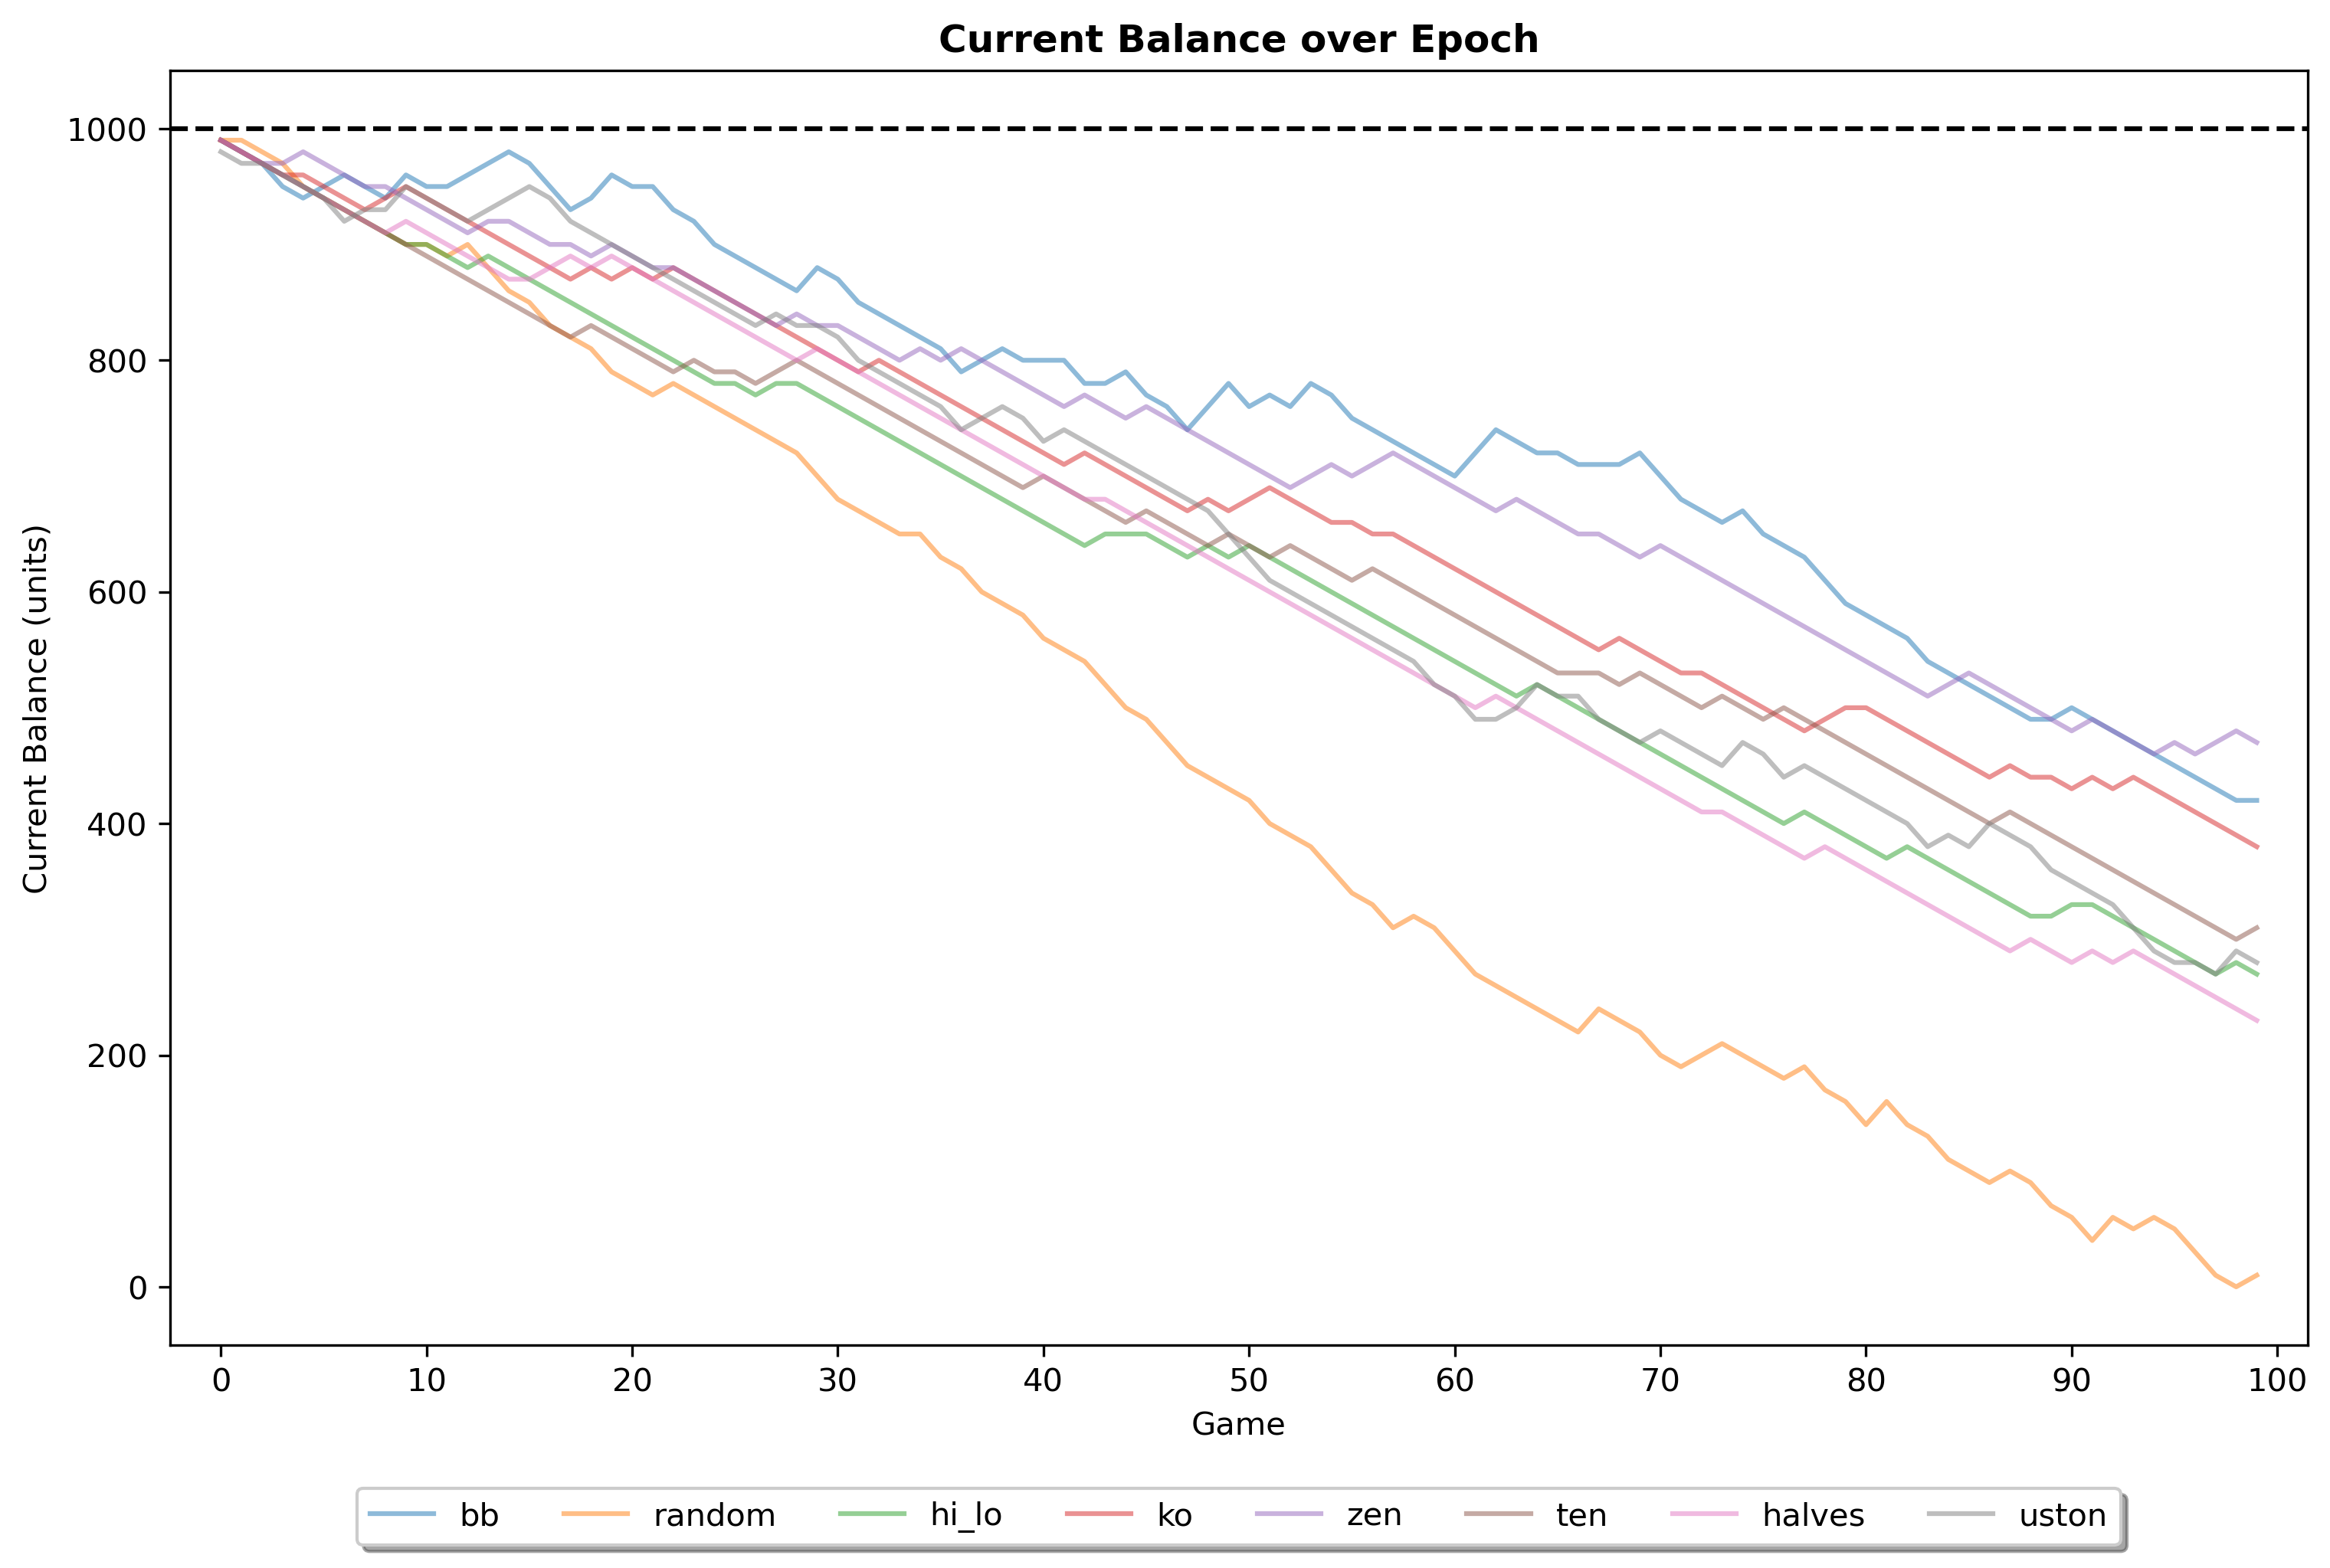

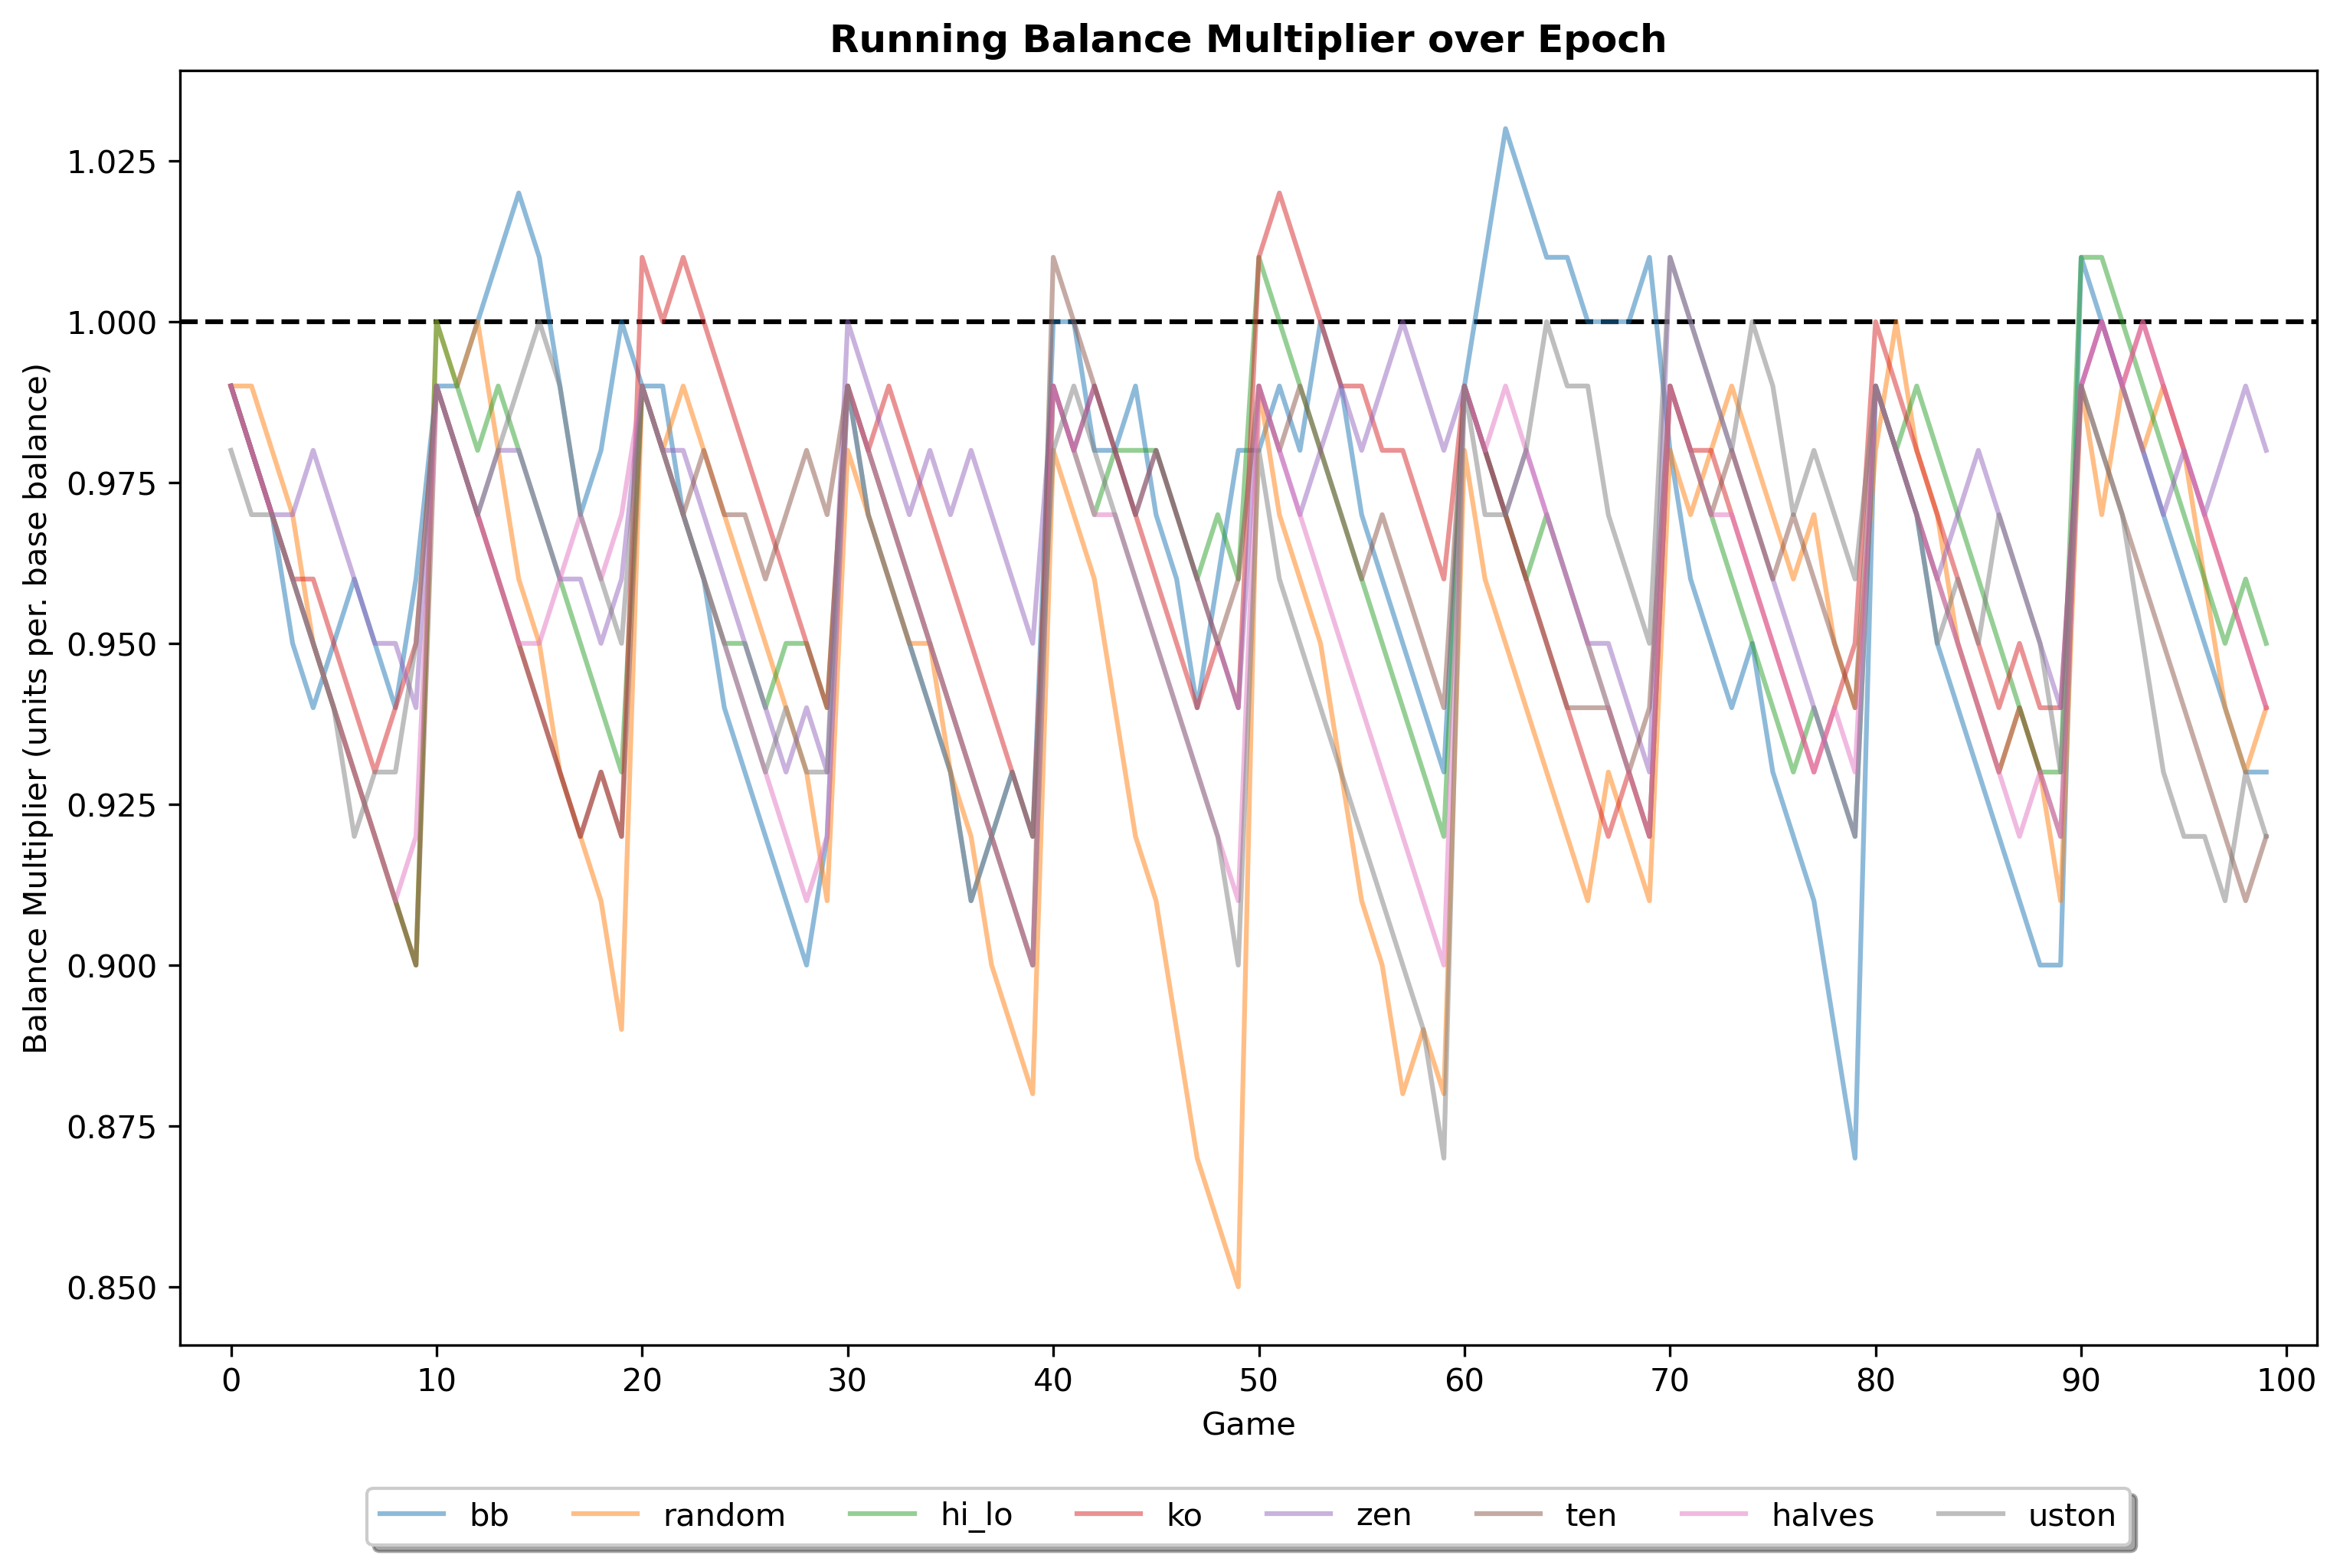

In [5]:
# plot the subset of data in some epoch(s)
plot_current_balance(df_balance, names, 0, 100)
plot_running_balance(df_batch_balance, names, 0, 100)


In [3]:
# other distributions

# discrete numeric
df_discrete_running = pd.read_csv('./debug/revamp/short_term/running_balance.csv')
df_discrete_current = pd.read_csv('./debug/revamp/short_term/batch_balance.csv')

# poisson
df_poisson_running = pd.read_csv('./debug/revamp/compare/poisson/running_balance.csv')
df_poisson_current = pd.read_csv('./debug/revamp/compare/poisson/batch_balance.csv')

# norm
df_norm_running = pd.read_csv('./debug/revamp/compare/norm/running_balance.csv')
df_norm_current = pd.read_csv('./debug/revamp/compare/norm/batch_balance.csv')

# discrete numeric
df_lognorm_running = pd.read_csv('./debug/revamp/compare/lognorm/running_balance.csv')
df_lognorm_current = pd.read_csv('./debug/revamp/compare/lognorm/batch_balance.csv')

In [4]:
# a selective plotting function (by chosen subset of data)
def plot_dist_running_balance(min_index: int, max_index: int) -> None:
    # set up plot
    fig, ax = plt.subplots(1,1, figsize=(12,8), dpi=300)

    # names
    names = ['discrete', 'poisson', 'norm', 'lognorm']

    # threshold line
    ax.axhline(1000, linestyle='--', color='black')

    # plot selected outcomes for all strategies
    df_discrete_running['bb'][min_index:max_index].plot(ax=ax, label='discrete', alpha=0.5, linewidth=1.5)
    df_poisson_running['bb'][min_index:max_index].plot(ax=ax, label='poisson', alpha=0.5, linewidth=1.5)
    df_norm_running['bb'][min_index:max_index].plot(ax=ax, label='norm', alpha=0.5, linewidth=1.5)
    df_lognorm_running['bb'][min_index:max_index].plot(ax=ax, label='lognorm', alpha=0.5, linewidth=1.5)
    
    # configure main plot for legend
    box = ax.get_position()
    ax.set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height * 0.9])
    # add legend
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=len(names) + 1)
    
    # make the plot a bit more readable
    ax.set_title('Current Balance over Epoch', fontweight='bold')
    ax.set_xlabel('Game')
    ax.set_ylabel('Balance Multiplier (units per. base balance)')
    # define xticks separation
    # separation = 100
    fences = 10
    # tick_factor = int(np.floor(max_index - min_index) / separation)
    ax.set_xticks(np.linspace(min_index, max_index, fences + 1))
    # and some stylistic choices
    ax.margins(x=0.025)
    
    # show final plot
    plt.show()

In [5]:
# a selective plotting function (by chosen subset of data)
def plot_dist_current_balance(min_index: int, max_index: int) -> None:
    # set up plot
    fig, ax = plt.subplots(1,1, figsize=(12,8), dpi=300)

    # names
    names = ['discrete', 'poisson', 'norm', 'lognorm']

    # threshold line
    ax.axhline(1.0, linestyle='--', color='black')

    # plot selected outcomes for all strategies
    df_discrete_current['bb'][min_index:max_index].plot(ax=ax, label='discrete', alpha=0.5, linewidth=1.5)
    df_poisson_current['bb'][min_index:max_index].plot(ax=ax, label='poisson', alpha=0.5, linewidth=1.5)
    df_norm_current['bb'][min_index:max_index].plot(ax=ax, label='norm', alpha=0.5, linewidth=1.5)
    df_lognorm_current['bb'][min_index:max_index].plot(ax=ax, label='lognorm', alpha=0.5, linewidth=1.5)

    # configure main plot for legend
    box = ax.get_position()
    ax.set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height * 0.9])
    # add legend
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=len(names) + 1)
    
    # make the plot a bit more readable
    ax.set_title('Running Balance Multiplier over Epoch', fontweight='bold')
    ax.set_xlabel('Game')
    ax.set_ylabel('Current Balance (units)')
    # define xticks separation
    # separation = 100
    fences = 10
    # tick_factor = int(np.floor(max_index - min_index) / separation)
    ax.set_xticks(np.linspace(min_index, max_index, fences + 1))
    # and some stylistic choices
    ax.margins(x=0.025)
    
    # show final plot
    plt.show()

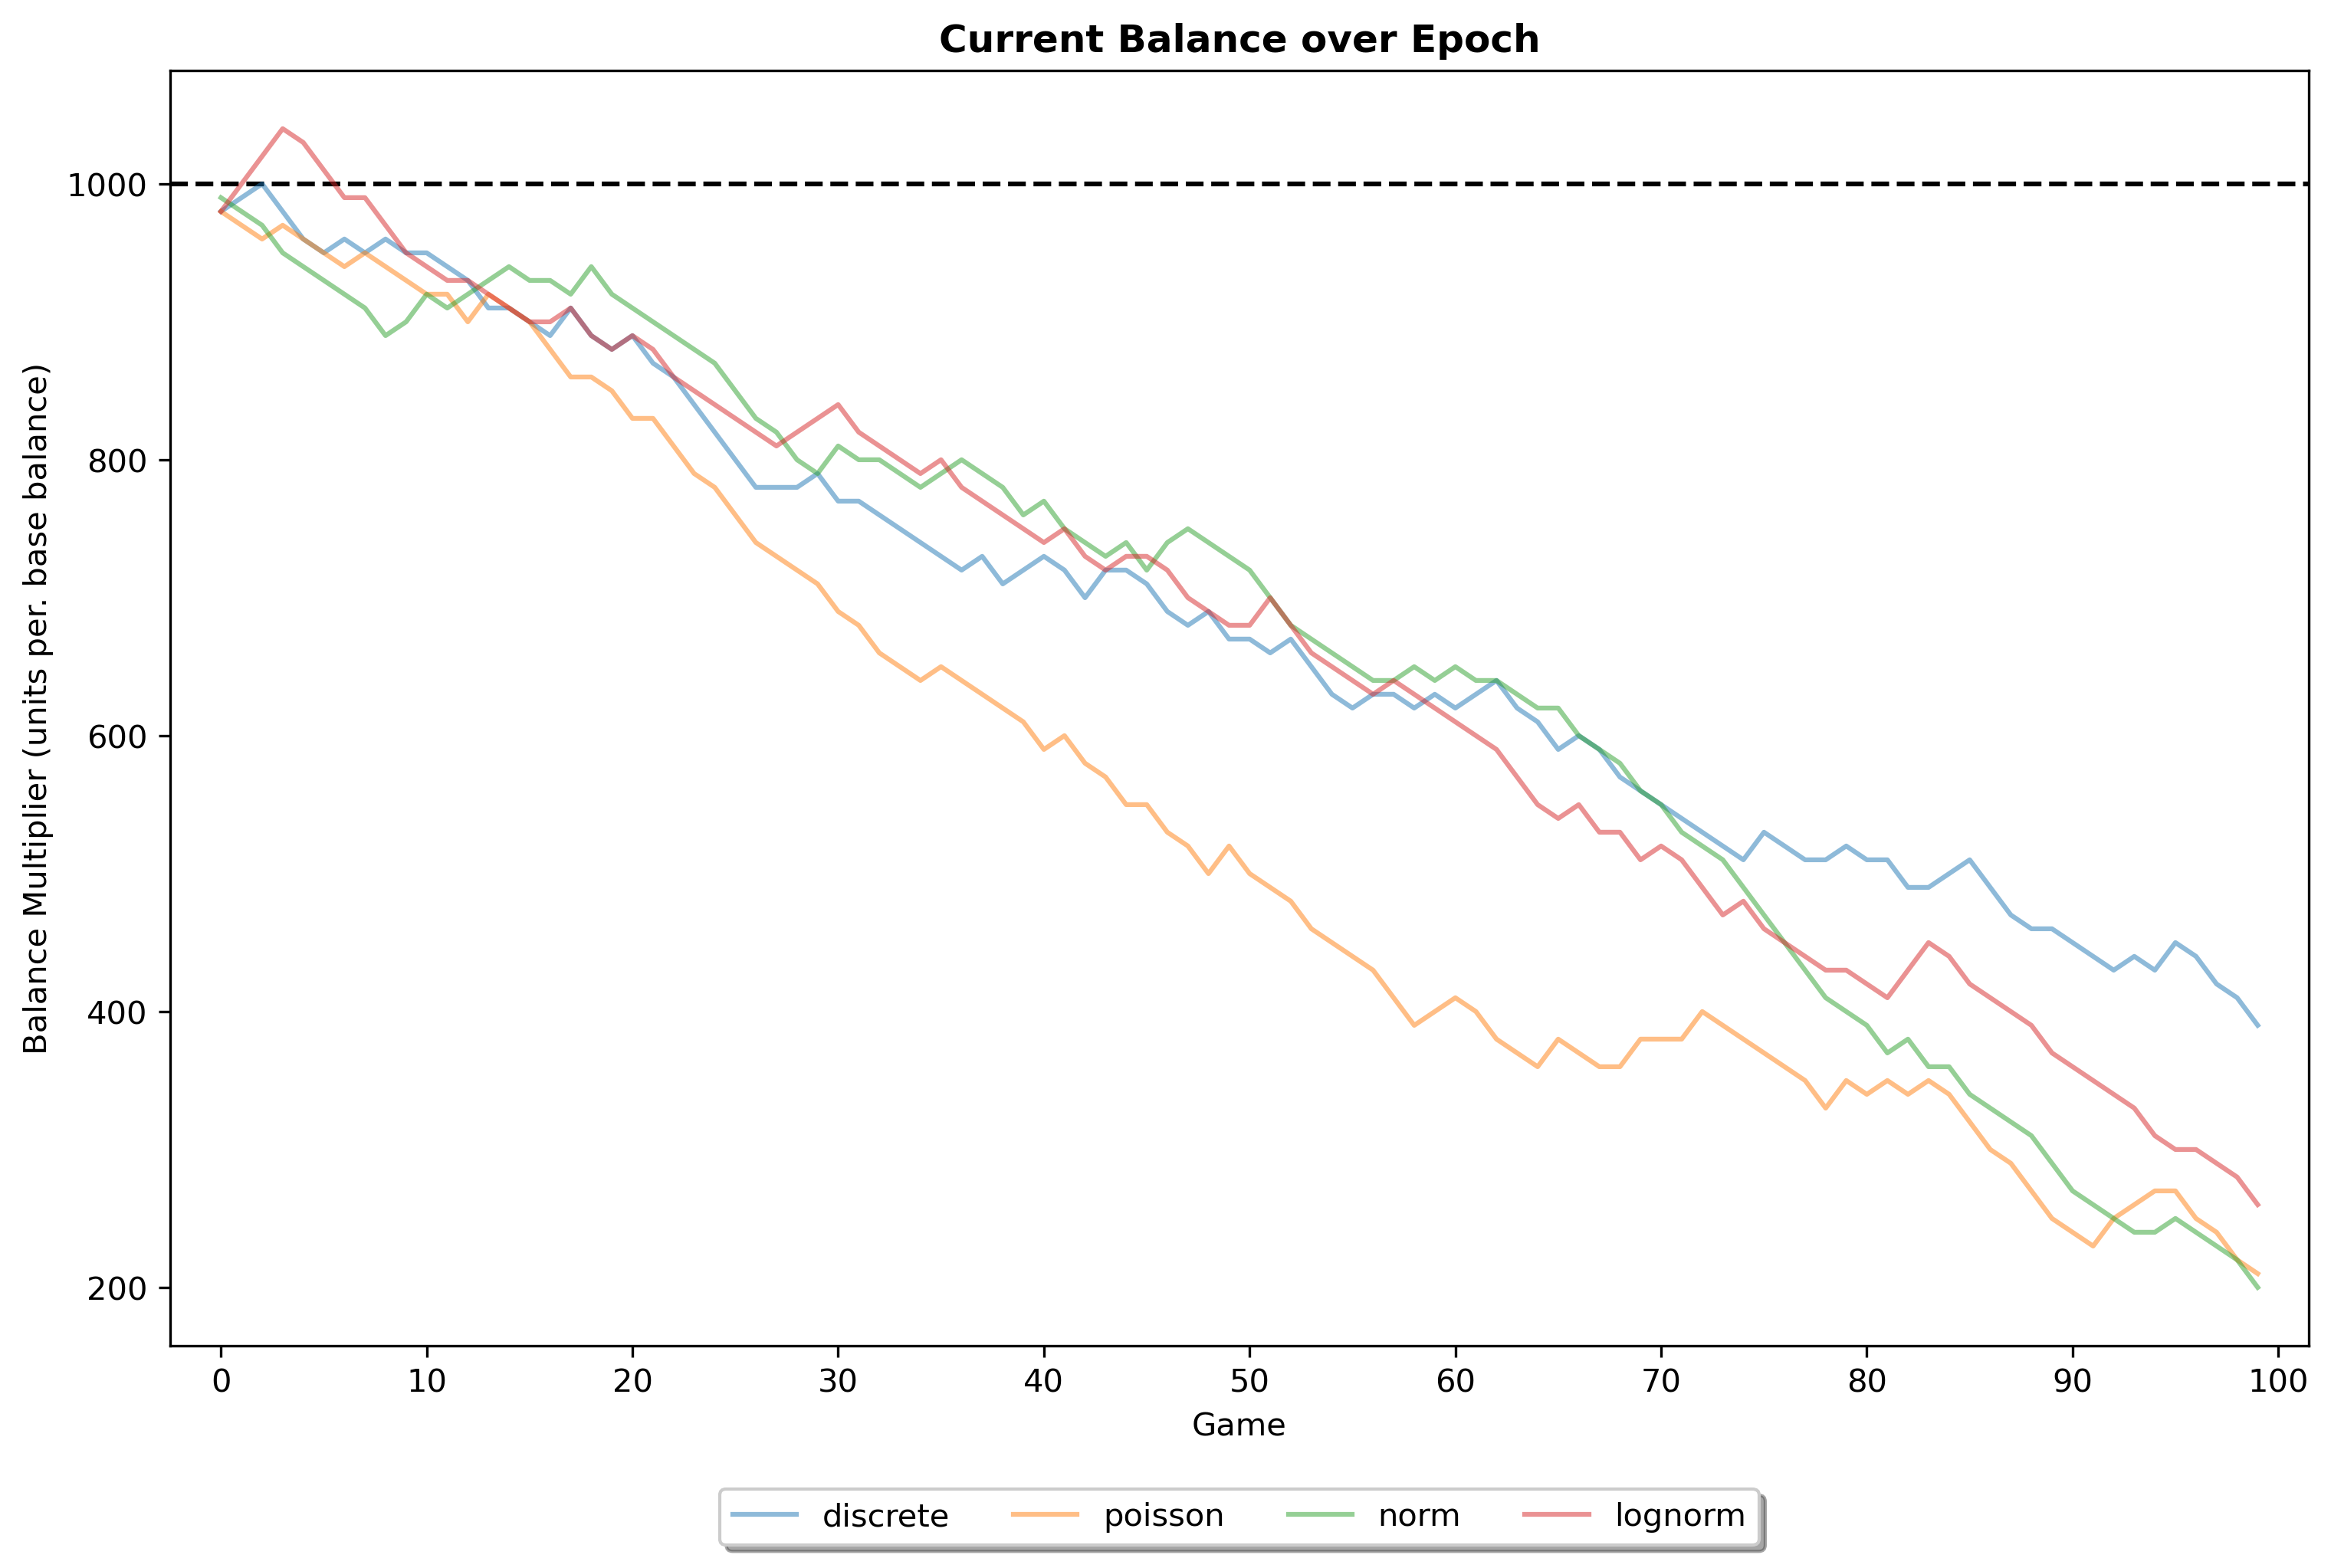

In [6]:
# distribution comparison\
# running balance
plot_dist_running_balance(0,100)

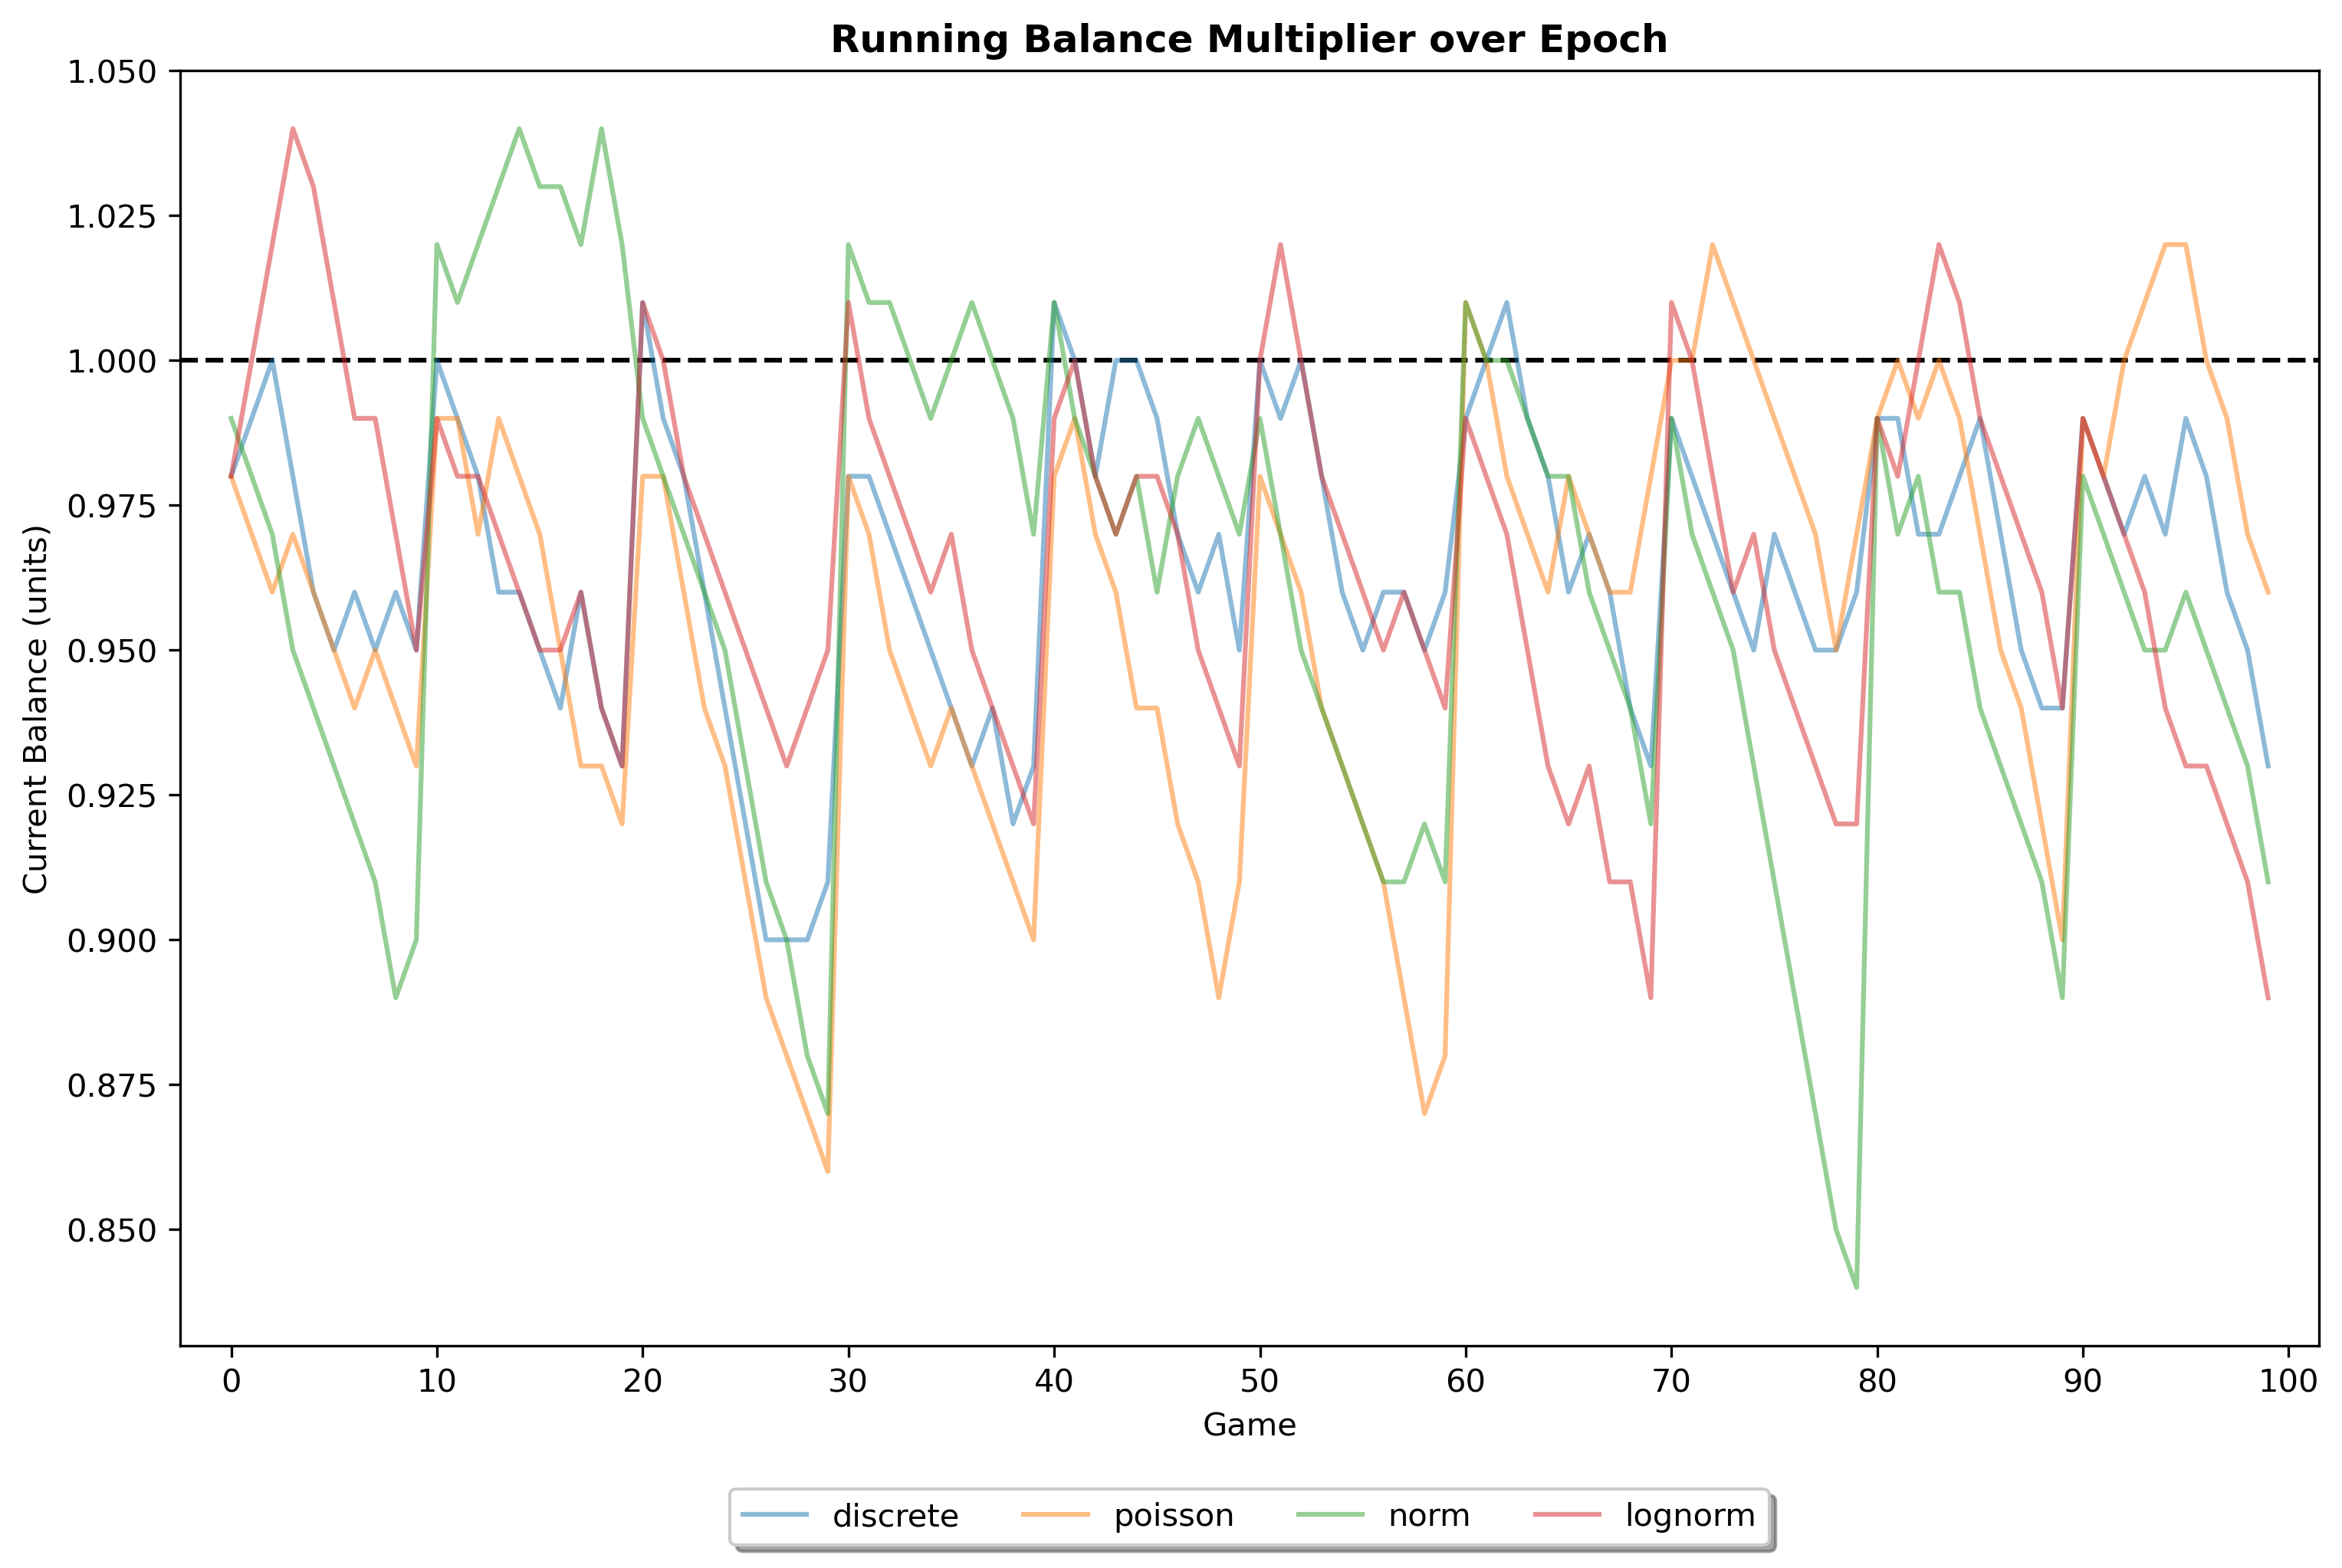

In [7]:
plt.close()
# current balance
plot_dist_current_balance(0,100)